## Challenge 1

3. comparing Paris with Chicago, they both have quite similar populations, 2.1m for Paris and 2.6m for Chicago. Looking into the two indicators of edge density and building footprint of the two cities, both of them show a positive correlation between the two indicators. Yet, with the Edge density around 500-550 km2, the Paris Building's footprint portion is around 20-30% while it is 40-50% for Chicago. Paris has a higher efficiency and diversity of land use, hosting almost the same amount of population as Chicago, but with nearly half of the Building's footprint portion. Whereas, Chicago might have a rather low-density mode of residential development that spread out of the city. That could also affect the mobility patterns of the citizens. With a widespread development mode, traffic demand is relatively high since citizen has to travel long distance from point to point. With Building footprint already taking up a high portion of land in the urban area, land for infrastructure and transport is relatively reduced or public space may be taken for infrastructure, this leaves the connectivity and livability of the city a question.

4. The utilization of Urban Networks remains a question due to the existence of a non-linear relationship between humans and place. Despite all the linear approaches from the paper, it may be turned into a pitfall when people hold interests and feelings that are hard to quantify. These interests and feelings shift over time, same as the urban, and the community, these are all constantly changing and hard to predict.
This study is conducted on a global scale with the comparison between cities under the same indicator, this assumes that a city is Homogeneous and urban networks can be utilized commonly. Cities are inherited in terms of their urban form, history, cultural context, population distribution, and infrastructure development. They could possibly be heterogeneous and require us to approach them differently. 
Government and Policy also took part in today's urban network, transportation, road, and electricity which are all owned or controlled by the government, the study lacks sensitivity to Local authority and Policies.

## Challenge 2
https://www.arcgis.com/apps/dashboards/93e510c252504e63a7af347053bab26a
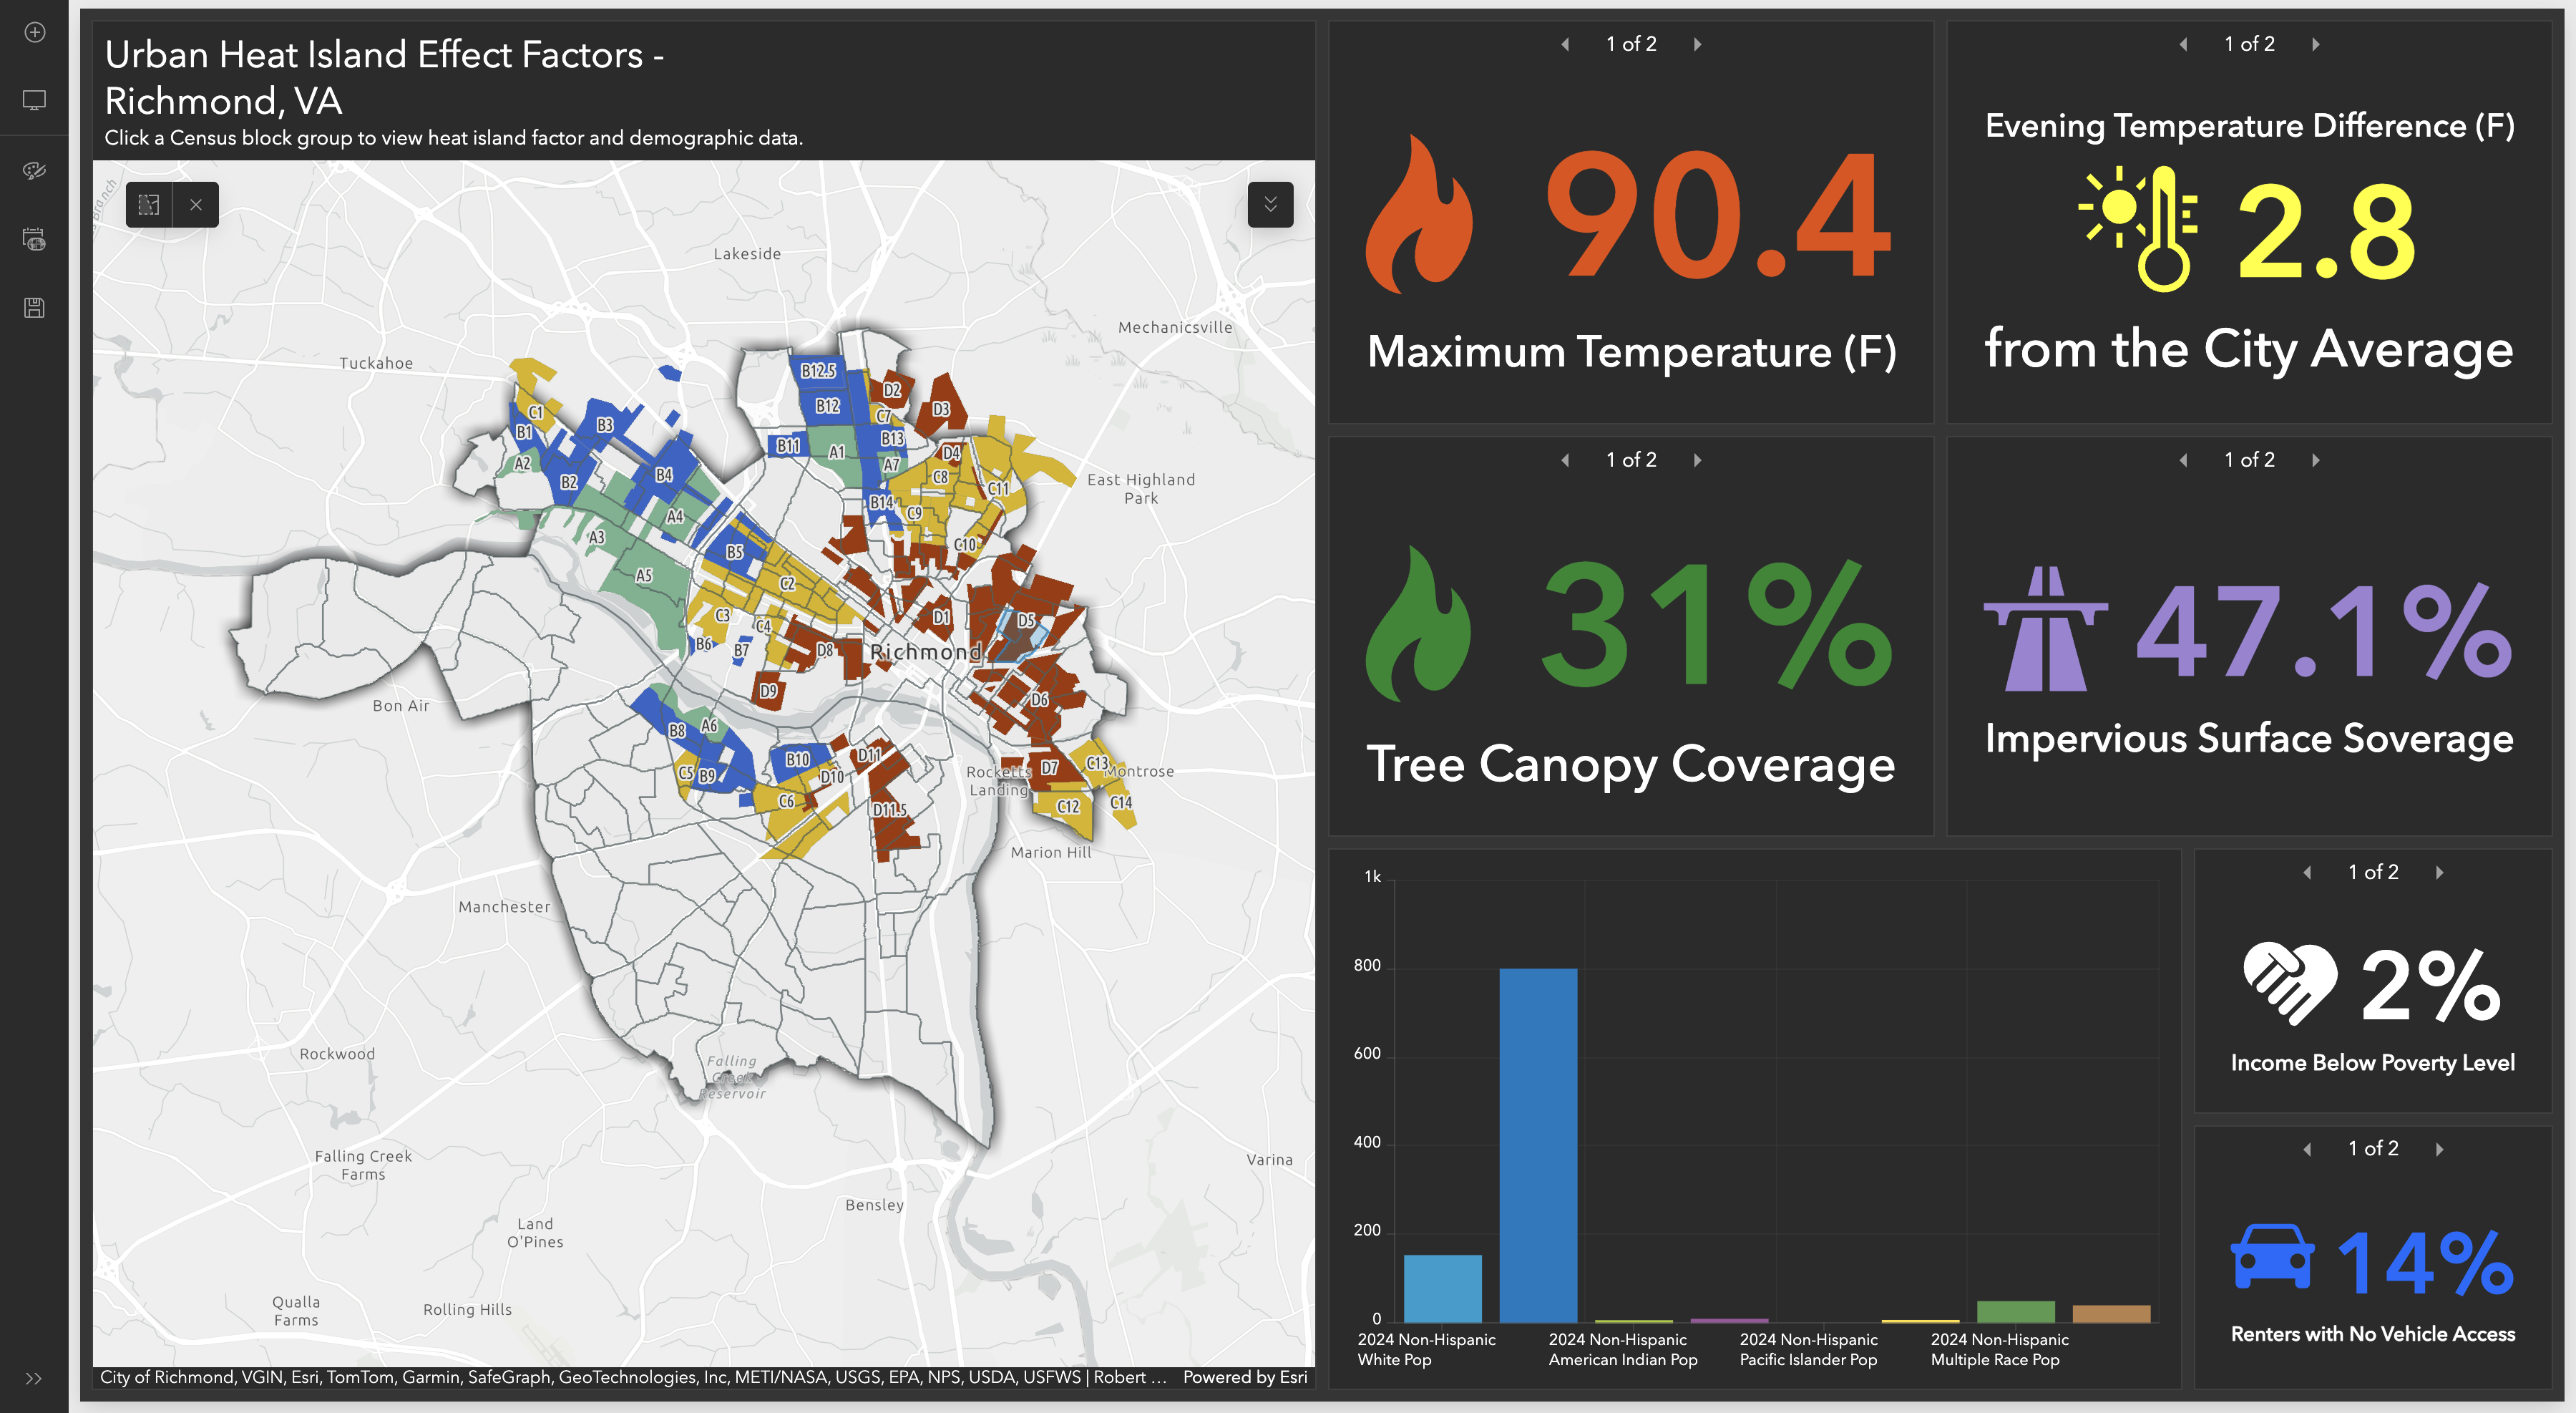

## Challenge 3

In [ ]:
import folium
import geopandas as gpd

# Reading the shape file
simd_gdf = gpd.read_file("/Users/hoitik/Desktop/Assginment_1/Lab 4/SG_SIMD_2020/SG_SIMD_2020.shp")

# Extract the data for the city of Edinburgh by
# Creating a subset have a value of 'City of Edinburgh' in column 'LAName'
edinburgh_gdf = simd_gdf[simd_gdf['LAName'] == 'City of Edinburgh']
edinburgh_gdf.set_index('DataZone', inplace=True)

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plotting the histogram for the number of people in households that are overcrowded
fig, ax = plt.subplots(figsize=(7, 5))
sns.histplot(data=edinburgh_gdf, x="HouseNumOC", ax=ax, kde=True) 
ax.set_title("Number of people in households that are overcrowded")

# Display graph
plt.tight_layout()
plt.show()

In [ ]:
import mapclassify as mc

# The number of class that the data is going to break into
num_classes = 5

# Using the method of Natural Breaks for classification
classifier_nb = mc.NaturalBreaks(edinburgh_gdf['HouseNumOC'], k=num_classes)

# Display result (Natural Breaks)
print(classifier_nb)
print(min(classifier_nb.bins), max(classifier_nb.bins))
print(classifier_nb.bins) 

# Using the method of EqualInterval for classification
classifier_ei = mc.EqualInterval(edinburgh_gdf['HouseNumOC'], k=num_classes)

# Display result (EqualInterval)
print(classifier_ei)
print(min(classifier_ei.bins), max(classifier_ei.bins))
print(classifier_ei.bins) 

In [ ]:
# Plotting a single figure with two graph
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Plot 1: a histogram with Natural Breaks
sns.histplot(data=edinburgh_gdf, x="HouseNumOC", ax=axes[0], kde=True, bins=20)
axes[0].axvline(classifier_nb.bins[0], color='red', linestyle='dashed', linewidth=2, label='Natural Breaks')

# Create a break line
for bin_value in classifier_nb.bins:
    axes[0].axvline(bin_value, color='red', linestyle='dashed', linewidth=2)

axes[0].set_title("No. of people in households that are overcrowded Histogram with Natural Breaks")
axes[0].legend()

# Plot 2: a histogram with EqualInterval
sns.histplot(data=edinburgh_gdf, x="HouseNumOC", ax=axes[1], kde=True, bins=20)
axes[1].axvline(classifier_ei.bins[0], color='blue', linestyle='dashed', linewidth=2, label='EqualInterval')

# Create a break line
for bin_value in classifier_ei.bins:
    axes[1].axvline(bin_value, color='blue', linestyle='dashed', linewidth=2)

axes[1].set_title("No. of people in households that are overcrowded Histogram with EqualInterval")
axes[1].legend()

# Display the graph
plt.tight_layout()
plt.show()

In [ ]:
# Plotting a single figure with two graph
fig, axs = plt.subplots(1, 2, figsize=(18, 8))

# Choropleth Map with Natural Breaks
edinburgh_gdf.plot(column='HouseNumOC', ax=axs[0],
         legend=True, cmap='viridis',
         scheme='UserDefined',
         classification_kwds={'bins': classifier_nb.bins}
        )

axs[0].set_title("Choropleth Map with Natural Breaks")

# Choropleth Map with Equal Intervals
edinburgh_gdf.plot(column='HouseNumOC', ax=axs[1],
         legend=True, cmap='viridis',
         scheme='UserDefined',
         classification_kwds={'bins': classifier_ei.bins})

axs[1].set_title("Choropleth Map with Equal Intervals")

plt.tight_layout() 
plt.show()

In comparison of Natural Breaks and Equal Intervals, Natural Breaks would change the proportion of each class to accommodate
the data. In the choropleth Map, Natural Breaks allow data to fall a bit more evenly than equal intervals. Whereas, in Equal intervals, the proportion of each class would not change by the data. 

In [ ]:
# Classification of HouseNumOC with Natural Breaks
num_classes = 5

classifier_nb = mc.NaturalBreaks(edinburgh_gdf['HouseNumOC'], k=num_classes)
edinburgh_gdf['classification_nb'] = classifier_nb.yb 
print(classifier_nb)
print(edinburgh_gdf[['HouseNumOC', 'classification_nb']])


In [ ]:
import plotly.express as px

#Ensure the CRS
edinburgh_gdf = edinburgh_gdf.to_crs(epsg=4326)

#Plot the map for edinburgh
fig2 = px.choropleth_map(edinburgh_gdf,
                           geojson=edinburgh_gdf,  
                           locations=edinburgh_gdf.index,
                           color="classification_nb",
                           color_continuous_scale="viridis",
                           range_color=(1, 5),
                           opacity=0.5,
                           center={"lat": 55.9533, "lon": -3.1883},  
                           map_style="carto-positron",
                           zoom=10)  

# Display map
fig2.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig2.show()

In [ ]:
# Extract the data with value equal to Glasgow City in the 'LAName' column 
glasgow_gdf = simd_gdf[simd_gdf['LAName'] == 'Glasgow City']
glasgow_gdf.set_index('DataZone', inplace=True)

#Classification of HouseNumOC with Natural Breaks
num_classes = 5

classifier_nb_glasgow = mc.NaturalBreaks(glasgow_gdf['HouseNumOC'], k=num_classes)
glasgow_gdf['classification_nb'] = classifier_nb_glasgow.yb 
print(classifier_nb_glasgow)
print(glasgow_gdf[['HouseNumOC', 'classification_nb']])

In [ ]:
glasgow_gdf = glasgow_gdf.to_crs(epsg=4326)

fig = px.choropleth_map(glasgow_gdf,
                           geojson=glasgow_gdf,  
                           locations=glasgow_gdf.index,
                           color="classification_nb",
                           color_continuous_scale="viridis",
                           range_color=(1, 5),
                           opacity=0.5,
                           center={"lat": 55.866193, "lon": -4.258246},  
                           map_style="carto-positron",
                           zoom=10,)  

fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()
